In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [3]:
fp_danra = "/dmidata/projects/cloudphysics/danra/data/v0.3.0/height_levels.zarr/"
url_era5 = "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2"

In [8]:
ds_era5 = xr.open_zarr(url_era5, chunks={"time": 48}, consolidated=True,)
ds_era5 = ds_era5.rename(dict(longitude="lon", latitude="lat"))
ds_era5

<xarray.Dataset>
Dimensions:                                           (time: 552264, lat: 721,
                                                       lon: 1440, level: 37)
Coordinates:
  * lat                                               (lat) float32 90.0 ... ...
  * level                                             (level) int64 1 2 ... 1000
  * lon                                               (lon) float32 0.0 ... 3...
  * time                                              (time) datetime64[ns] 1...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, lat, lon) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, lat, lon) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, lat, lon) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (lat, lon) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (lat, lon) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, lat, lon) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, lat, lon) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (lat, lon) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (lat, lon) float32 dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, lat, lon) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, lat, lon) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, lat, lon) float32 dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

In [15]:
ds_danra_hl = xr.open_zarr(fp_danra)
ds_danra_hl

<xarray.Dataset>
Dimensions:   (altitude: 1, y: 589, x: 789, time: 29120)
Coordinates:
  * altitude  (altitude) int64 100
    lat       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
    lon       (y, x) float64 dask.array<chunksize=(256, 256), meta=np.ndarray>
  * time      (time) datetime64[ns] 1990-09-01 ... 2000-08-18T21:00:00
  * x         (x) float64 -1.999e+06 -1.997e+06 ... -3.175e+04 -2.925e+04
  * y         (y) float64 -6.095e+05 -6.07e+05 -6.045e+05 ... 8.58e+05 8.605e+05
Data variables:
    r         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    t         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    u         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
    v         (altitude, time, y, x) float64 dask.array<chunksize=(1, 256, 256, 256), meta=np.ndarray>
Attributes:
    description:  All prognostic variables for 10-year period on reduced levels

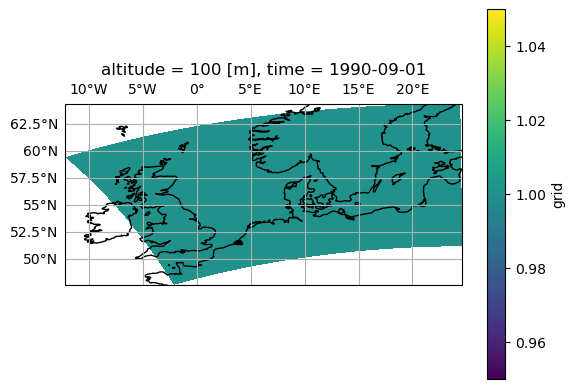

In [16]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
da_grid = xr.ones_like(ds_danra_hl.isel(time=0, altitude=0).t)
da_grid.name = "grid"
da_grid.attrs = {}

da_grid.plot(ax=ax, x="lon", y="lat")

ax.gridlines(draw_labels=["top", "left"])
ax.coastlines()

In [17]:
def create_mask(ds, bbox):
    da_mask = np.logical_and(
        np.logical_and(ds.lon > bbox[0], ds.lon < bbox[1]),
        np.logical_and(ds.lat > bbox[2], ds.lat < bbox[3]),
    )
    return da_mask

bbox = [8, 16, 54, 58] # W, E, S, N

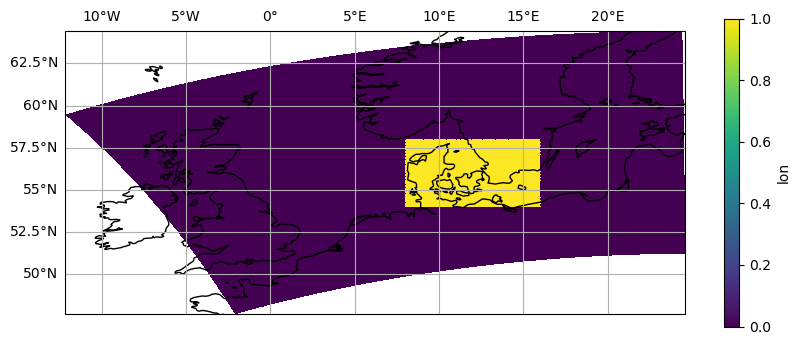

In [18]:
da_mask = create_mask(ds=ds_danra_hl, bbox=bbox)
fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(projection=ccrs.PlateCarree()))
da_mask.plot(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=["top", "left"])
ax.coastlines()

In [9]:
da = ds_era5['10m_u_component_of_wind'].isel(time=0)
da

<xarray.DataArray '10m_u_component_of_wind' (lat: 721, lon: 1440)>
dask.array<getitem, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time     datetime64[ns] 1959-01-01
Attributes:
    long_name:   10 metre U wind component
    short_name:  u10
    units:       m s**-1

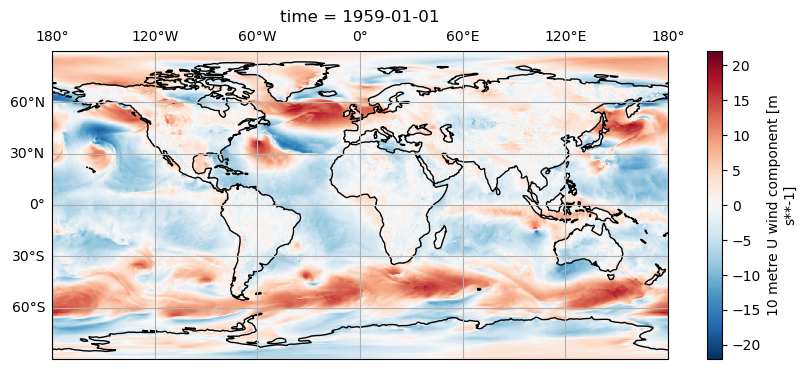

In [10]:
fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(projection=ccrs.PlateCarree()))
da.plot(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=["top", "left"])
ax.coastlines()

In [19]:
da_mask_era5 = create_mask(ds=ds_era5, bbox=bbox)
ds_era5

In [26]:
def create_lateral_boundary_mask(ds, bbox, width):
    da_mask_inner = create_mask(ds=ds, bbox=bbox)
    da_mask_outer = np.logical_and(
        np.logical_and(ds.lon > bbox[0] - width, ds.lon < bbox[1] + width),
        np.logical_and(ds.lat > bbox[2] - width, ds.lat < bbox[3] + width),
    )
    da_mask_edge = da_mask_outer ^ da_mask_inner
    return da_mask_edge

In [27]:
da_mask_era5 = create_lateral_boundary_mask(ds=ds_era5, bbox=bbox, width=1.0)
da_mask_era5

<xarray.DataArray 'lon' (lon: 1440, lat: 721)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0

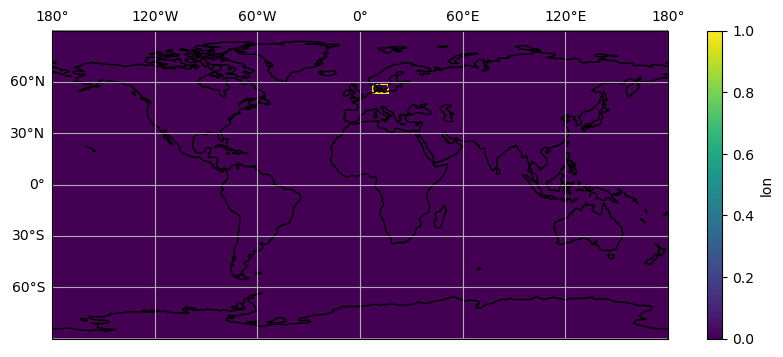

In [28]:
fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(projection=ccrs.PlateCarree()))
da_mask_era5.plot(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=["top", "left"])
ax.coastlines()

In [31]:
da_mask_danra = create_mask(ds=ds_danra_hl, bbox=bbox)
ds_era5_edge = ds_era5.where(da_mask_era5, drop=True)

In [33]:
da_danra = ds_danra_hl.isel(time=0).where(da_mask.compute(), drop=True).t
da_danra

<xarray.DataArray 't' (altitude: 1, y: 211, x: 229)>
dask.array<where, shape=(1, 211, 229), dtype=float64, chunksize=(1, 116, 152), chunktype=numpy.ndarray>
Coordinates:
  * altitude  (altitude) int64 100
    lat       (y, x) float64 53.16 53.17 53.17 53.18 ... 58.76 58.76 58.76 58.77
    lon       (y, x) float64 8.371 8.407 8.443 8.48 ... 15.66 15.71 15.75 15.79
    time      datetime64[ns] 1990-09-01
  * x         (x) float64 -1.099e+06 -1.097e+06 ... -5.317e+05 -5.292e+05
  * y         (y) float64 -2.595e+05 -2.57e+05 -2.545e+05 ... 2.63e+05 2.655e+05
Attributes:
    level_type:   heightAboveGround
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  heightAboveGround
    units:        K

In [34]:
da_era5 = ds_era5_edge.sel(time=da_danra.time, method="nearest")["2m_temperature"]
da_era5

<xarray.DataArray '2m_temperature' (lat: 23, lon: 39)>
dask.array<getitem, shape=(23, 39), dtype=float32, chunksize=(23, 39), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 58.75 58.5 58.25 58.0 57.75 ... 54.0 53.75 53.5 53.25
  * lon      (lon) float32 7.25 7.5 7.75 8.0 8.25 ... 16.0 16.25 16.5 16.75
    time     datetime64[ns] 1990-09-01
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

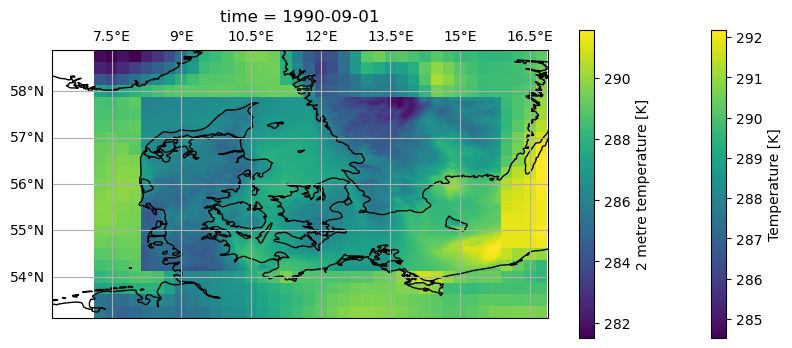

In [35]:
fig, ax = plt.subplots(figsize=(10, 4), subplot_kw=dict(projection=ccrs.PlateCarree()))
da_danra.plot(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
da_era5.plot(ax=ax, x="lon", y="lat", transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=["top", "left"])
ax.coastlines()